In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import DBSCAN
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

import pandas as pd

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

#import MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler

# PCA scatterplot
import plotly.express as px
from sklearn.decomposition import PCA

#for box and whisker plots
import seaborn as sns

# import data

In [3]:
# load geo data
nyc_geo_dataframe = pd.read_csv("nyc_data.csv")

In [4]:
#will we just cluster on this or take out a few things

In [5]:
nyc_geo_dataframe

,name,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,Allerton,-73.859319,40.865788,860.0,1.50,28707.0,511.5,27.259983
1,Annadale,-74.178549,40.538114,11.0,1.75,27073.0,263.7,45.011856
2,Arden Heights,-74.185887,40.549286,10.0,1.70,25117.0,482.5,44.121985
3,Arlington,-74.165104,40.635325,0.0,1.55,29715.0,482.5,38.728529
4,Arrochar,-74.067124,40.596313,145.0,1.75,15659.0,317.3,48.440916
...,...,...,...,...,...,...,...,...
297,Woodhaven,-73.858110,40.689887,2058.0,1.40,55411.0,222.2,40.725764
298,Woodlawn,-73.867315,40.898273,810.0,1.40,43034.0,260.1,45.936409
299,Woodrow,-74.205246,40.541968,5.0,1.75,19829.0,297.5,44.273276
300,Woodside,-73.901842,40.746349,4567.0,1.40,44473.0,243.9,46.964018


In [6]:
#leaves out longitude and latitude
nyc_geo_dataframe_features_only = nyc_geo_dataframe[['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score']]

# Optional: Normalize Data

In [7]:
#normalize
scaler = MinMaxScaler()
normalized_df1 = scaler.fit_transform(nyc_geo_dataframe_features_only)
normalized_df1


array([[4.26096952e-03, 3.88888889e-01, 1.80149481e-01, 1.12784609e-01,
        2.26247536e-01],
       [5.45007729e-05, 6.66666667e-01, 1.69895388e-01, 3.98893922e-02,
        4.80298979e-01],
       [4.95461572e-05, 6.11111111e-01, 1.57620599e-01, 1.04253692e-01,
        4.67563822e-01],
       ...,
       [2.47730786e-05, 6.66666667e-01, 1.24435993e-01, 4.98323234e-02,
        4.69728978e-01],
       [2.26277300e-02, 2.77777778e-01, 2.79088302e-01, 3.40648350e-02,
        5.08236863e-01],
       [2.31970153e-01, 7.22222222e-01, 4.85437807e-01, 2.35394481e-01,
        4.51739222e-01]])

In [8]:
#make interpretable df
normalized_df2 = pd.DataFrame(data=normalized_df1, columns=['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score'])
normalized_df2

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score
0,0.004261,0.388889,0.180149,0.112785,0.226248
1,0.000055,0.666667,0.169895,0.039889,0.480299
2,0.000050,0.611111,0.157621,0.104254,0.467564
3,0.000000,0.444444,0.186475,0.104254,0.390377
4,0.000718,0.666667,0.098267,0.055657,0.529373
...,...,...,...,...,...
297,0.010197,0.277778,0.347729,0.027681,0.418960
298,0.004013,0.277778,0.270058,0.038830,0.493530
299,0.000025,0.666667,0.124436,0.049832,0.469729
300,0.022628,0.277778,0.279088,0.034065,0.508237


# PCA feature reduction

In [9]:
n_components = 3 #from above

In [11]:
pca = PCA(n_components = n_components)
components = pca.fit_transform(normalized_df2)



# Create clustering model using DBSCAN

In [40]:
#use grid search to optimize these
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='manhattan')

## fit the data

In [41]:
# fit and predict
db_clusters = db.fit_predict(components)
db_clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

## Plot the results:

In [38]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

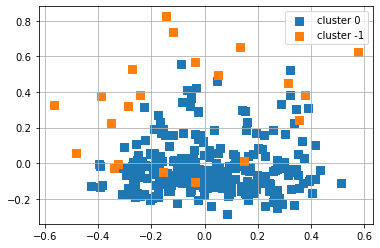

In [42]:
# Plot DBSCAN clusters
plot_clusters(components, db_clusters)